In [2]:
# pip install seaborn

In [3]:
# EDA Titanic
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import pivot_table

In [4]:

## 01 데이터 수집 및 로드
df = pd.read_csv('data/Pokemon.csv')
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [5]:
## 02 데이터구조 및 변수이해
print(df.shape)  #891행 12열
print(df.dtypes)
print(df.info)

(800, 13)
#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object
<bound method DataFrame.info of        #                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie

In [6]:
## 03.데이터요약 및 기술통계
df.describe()
df.describe(include='object')

,Name,Type 1,Type 2
count,800,800,414
unique,800,18,18
top,Skrelp,Water,Flying
freq,1,112,97


In [7]:
# 범주형 데이터 value_counts() 활용
# print(df['Pclass'].value_counts())
print(df.value_counts('Name'), end='\n\n')
print(df.value_counts('Type 1'), end='\n\n')
print(df.value_counts('Type 2'), end='\n\n')
print(df.value_counts('Total'), end='\n\n')
print(df.value_counts('HP'), end='\n\n')
print(df.value_counts('Defense'), end='\n\n')
print(df.value_counts('Sp. Atk'), end='\n\n')
print(df.value_counts('Sp. Def'), end='\n\n')
print(df.value_counts('Speed'), end='\n\n')
print(df.value_counts('Generation'), end='\n\n')
print(df.value_counts('Legendary'), end='\n\n')

Name
Vulpix                   1
Wailmer                  1
Wailord                  1
Walrein                  1
Wartortle                1
                        ..
Absol                    1
AbsolMega Absol          1
Accelgor                 1
AegislashBlade Forme     1
AegislashShield Forme    1
Name: count, Length: 800, dtype: int64

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ground       32
Dragon       32
Ghost        32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

Type 2
Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Rock        14
Ghost       14
Ice         14
Fire        12
Electric     6
Normal       4
Bug          3
Name: count, dtype: int64

Total
600    37
405    26
580   

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64


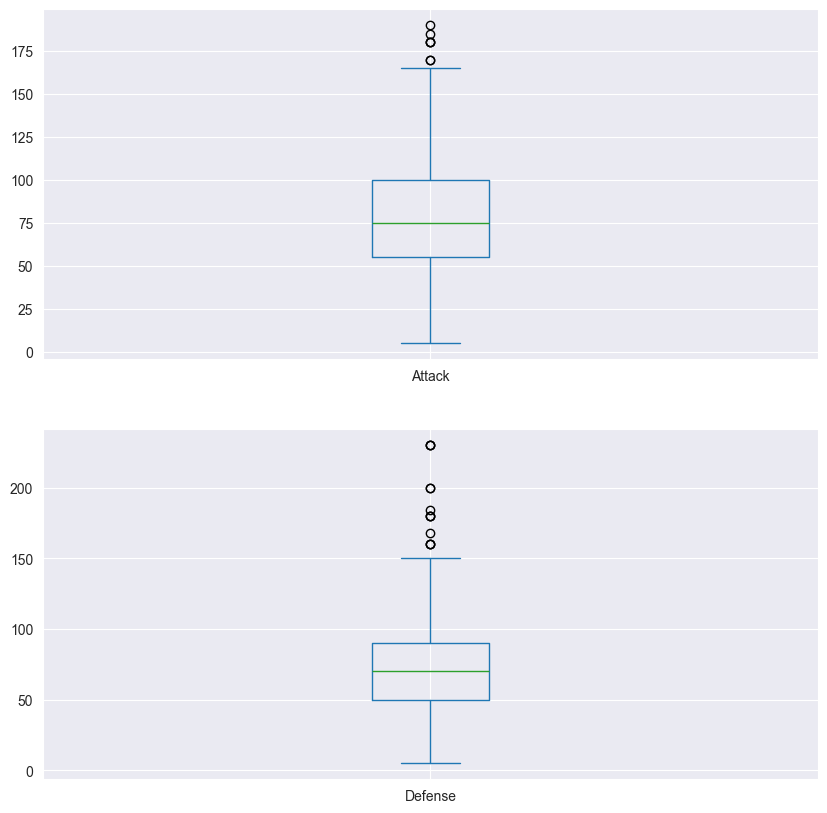

In [8]:
## 04.결측치, 이상치 탐지 Attact//Defend 중에 이상치 탐지
_,ax = plt.subplots(2,figsize=(10,10))
print(df.isna().sum())
df.duplicated('Attack').sum()
df['Attack'].plot(kind='box',ax=ax[0])
df.duplicated('Defense').sum()
df['Defense'].plot(kind='box',ax=ax[1])
plt.show()

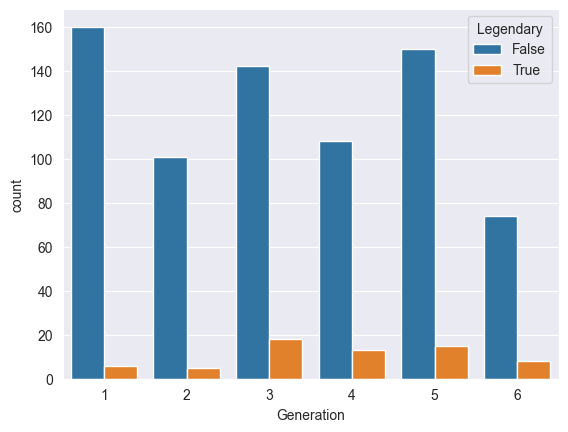

In [9]:
# 05 변수분포 시각화
sns.countplot(data=df, x='Generation', hue='Legendary') ##세대에 따른 전설포켓몬수
plt.show()

## 06 변수간의 관계 시각화

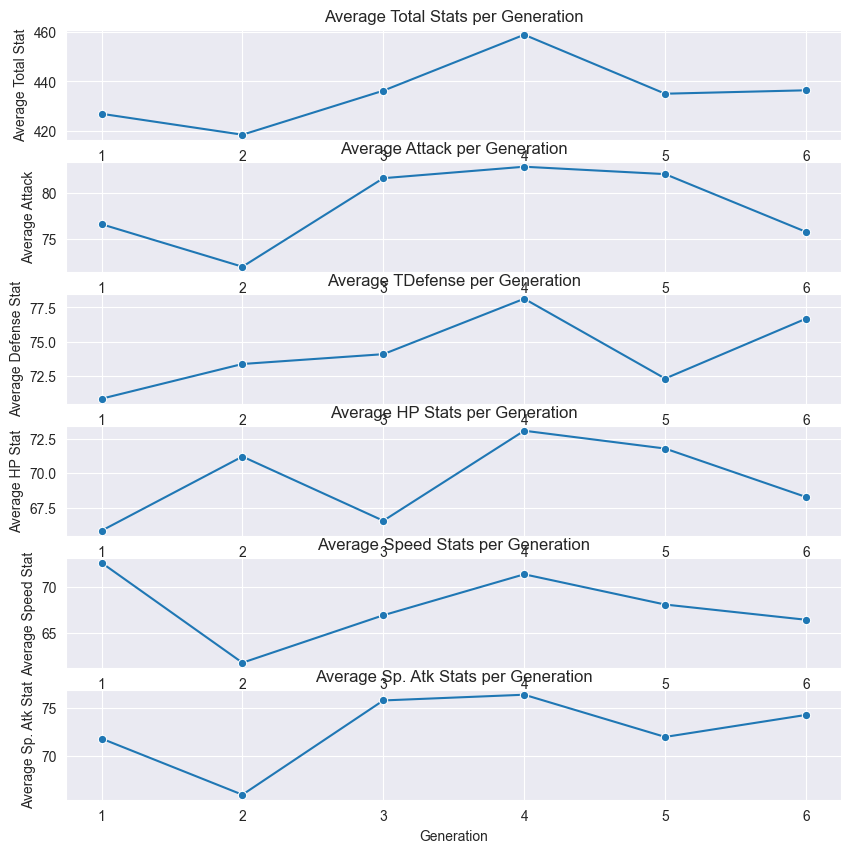

In [19]:

stats_by_gen = df.groupby('Generation')[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total']].mean()
# 세대별 평균 총합 스탯 (Total) 시각화

fig, ax = plt.subplots(6,1,figsize=(10,10))

sns.lineplot(ax=ax[0],data=stats_by_gen, y='Total', x=stats_by_gen.index, marker='o')
ax[0].set_title('Average Total Stats per Generation')
ax[0].set_xlabel('Generation')
ax[0].set_ylabel('Average Total Stat')

sns.lineplot(ax=ax[1],data=stats_by_gen, y='Attack', x=stats_by_gen.index, marker='o')
ax[1].set_title('Average Attack per Generation')
ax[1].set_xlabel('Generation')
ax[1].set_ylabel('Average Attack')

sns.lineplot(ax=ax[2],data=stats_by_gen, y='Defense', x=stats_by_gen.index, marker='o')
ax[2].set_title('Average TDefense per Generation')
ax[2].set_xlabel('Generation')
ax[2].set_ylabel('Average Defense Stat')

sns.lineplot(ax=ax[3],data=stats_by_gen, y='HP', x=stats_by_gen.index, marker='o')
ax[3].set_title('Average HP Stats per Generation')
ax[3].set_xlabel('Generation')
ax[3].set_ylabel('Average HP Stat')

sns.lineplot(ax=ax[4],data=stats_by_gen, y='Speed', x=stats_by_gen.index, marker='o')
ax[4].set_title('Average Speed Stats per Generation')
ax[4].set_xlabel('Generation')
ax[4].set_ylabel('Average Speed Stat')

sns.lineplot(ax=ax[5],data=stats_by_gen, y='Sp. Atk', x=stats_by_gen.index, marker='o')
ax[5].set_title('Average Sp. Atk Stats per Generation')
ax[5].set_xlabel('Generation')
ax[5].set_ylabel('Average Sp. Atk Stat')

plt.show()

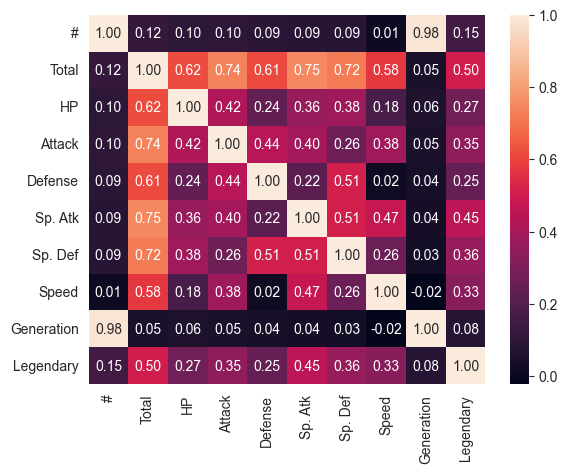

In [11]:
## 07.상관관계 및 교차분석
# - 연속형
# 데이터: 상관계수
# - 범주형
# 데이터: 교차표
corr_mat = df.corr(numeric_only=True)
corr_mat
sns.heatmap(corr_mat, annot=True, fmt='.2f')
plt.show()

In [11]:

# 교차표 --> 전설과 일반의 능력치차이
pd.crosstab(df['Legendary'], df['Attack'])
# 두 변수간 생존율 교차분석

Attack,5,10,15,20,22,23,24,25,27,29,...,147,150,155,160,164,165,170,180,185,190
Legendary,,,,,,,,,,,,,,,,,,,,,
False,2,3,1,8,1,1,1,7,1,1,...,1,5,2,2,1,3,1,0,1,0
True,0,0,0,0,0,0,0,0,0,0,...,0,6,0,3,0,0,1,3,0,1


In [ ]:
##전체중에 타입에 따른 분포도 -->